In [33]:
# 필요한 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 파일 경로 (이미 업로드된 경우, 해당 경로 사용)
file_path = '/content/car_evaluation.csv'

# 데이터 읽기
data = pd.read_csv(file_path)

# 데이터 확인
print("데이터 샘플:\n", data.head())
print("\n데이터 정보:\n")
data.info()

# 범주형 데이터를 숫자로 변환
categorical_columns = data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# 'unacc'가 예측해야 할 대상인 'class' 역할을 한다고 가정하고, 이를 y로 설정
X = data.drop(columns=['unacc'])  # 'unacc' 열을 제외한 나머지 특성들
y = data['unacc']  # 'unacc' 열을 타겟으로 설정

# 데이터 분할 (80% 학습, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



데이터 샘플:
    vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

데이터 정보:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


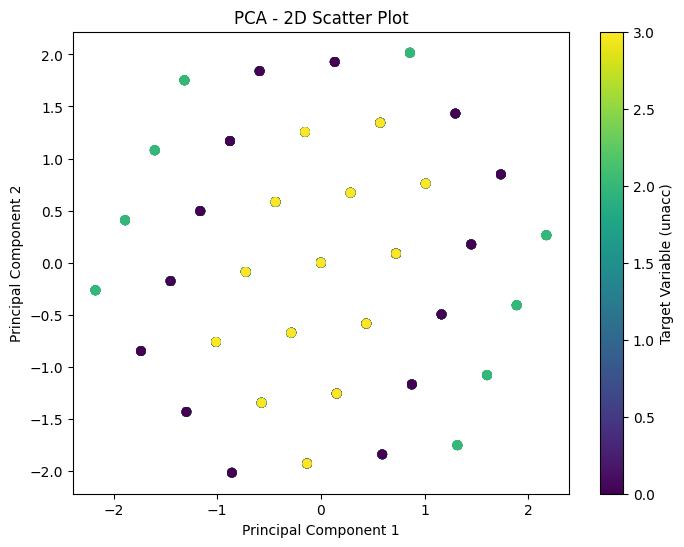

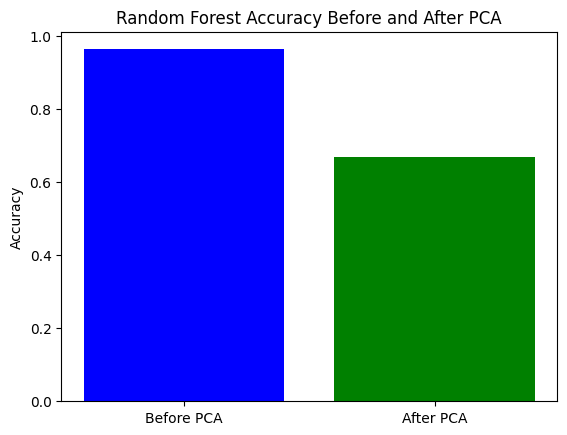

In [34]:
# 데이터 정규화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용
pca = PCA(n_components=2)  # 2차원으로 축소
X_pca = pca.fit_transform(X_scaled)

# PCA 결과 시각화 (2D 산점도)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.colorbar(label='Target Variable (unacc)')
plt.title('PCA - 2D Scatter Plot')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# 랜덤포레스트 모델 학습 및 성능 평가 (PCA 전)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
accuracy_before_pca = accuracy_score(y_test, y_pred)

# PCA 적용 후 모델 학습 및 성능 평가
X_train_pca, X_test_pca = X_pca[:len(X_train)], X_pca[len(X_train):]
rf.fit(X_train_pca, y_train)
y_pred_pca = rf.predict(X_test_pca)
accuracy_after_pca = accuracy_score(y_test, y_pred_pca)

# 정확도 비교 시각화
accuracies = [accuracy_before_pca, accuracy_after_pca]
models = ['Before PCA', 'After PCA']

plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy Before and After PCA')
plt.show()
